# EDA

Voy a realizar un analisis exploratorio sencillo intentanto contestar algunas preguntas clave que pueden llegar a surgir de los datos

In [68]:
# Importar librerías necesarias
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Cargar el dataset de entrenamiento
train = pl.read_csv("files/output/train.csv")


In [69]:
y = pl.read_csv("./files/output/target.csv")
y = y.rename({"TARGET": "target"})


In [70]:
#Eliminar posibles registros duplicados
y = y.unique(subset=["SK_ID_CURR"])
train = train.with_columns([
    pl.col("SK_ID_CURR").cast(pl.Int64)
])
#Combinar y con train para poder graficar y ver las distribuciones
train = train.join(y, on="SK_ID_CURR", how="left")


La primera pregunta que quiero visualizar es si es muy frecuente que la gente entre en mora.
Voy a visualizar que porcentaje entra en mora (1) y que porcentaje no (0).

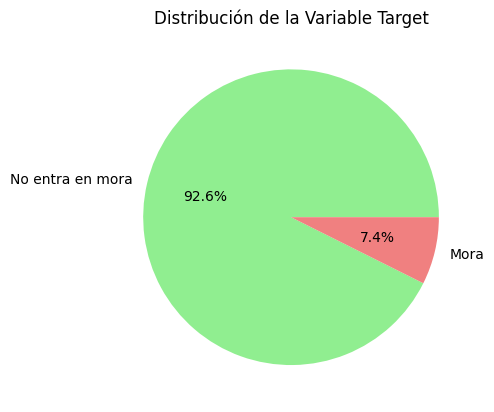

In [71]:
# Tomar una muestra de 20,000 filas del DataFrame de Polars
sample_train = train

# Convertir el DataFrame de Polars a Pandas
sample_train_pd = sample_train.to_pandas()

# Contar el número de 0s y 1s en la columna 'target'
target_counts = sample_train_pd["target"].value_counts()

# Crear gráfico de pastel
plt.pie(target_counts, labels=['No entra en mora', 'Mora'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribución de la Variable Target')
plt.show()


Ahora quiero ver si es mas comun que un hombre entre en mora o una mujer.
Segun la distribucion uno estaria tentado a decir que las mujeres entran en mora mas facil que los hombres pero es necesario ver cuantas mujeres hacen parte de la muestra y cuantos hombres

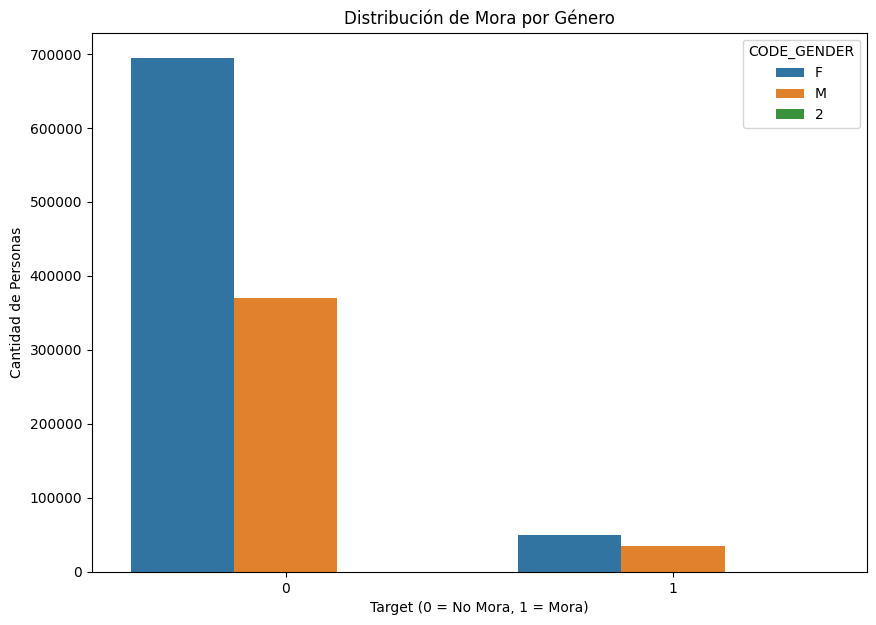

In [72]:
sample_train = train

# Convertir el DataFrame de Polars a Pandas
sample_train_pd = sample_train.to_pandas()

# Reemplazar los valores de 'CODE_GENDER' por 'M' para hombres y 'F' para mujeres
sample_train_pd["CODE_GENDER"] = sample_train_pd["CODE_GENDER"].replace({0: 'M', 1: 'F'})

# Crear el gráfico de barras con seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='target', hue='CODE_GENDER', data=sample_train_pd, ax=ax)

# Añadir etiquetas y título
plt.xlabel('Target (0 = No Mora, 1 = Mora)')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Mora por Género')
plt.show()


Vemos que las mujeres ocupan el 64% de la muestra por lo que es sesgado decir que las mujeres entran en mora mas que los hombres.

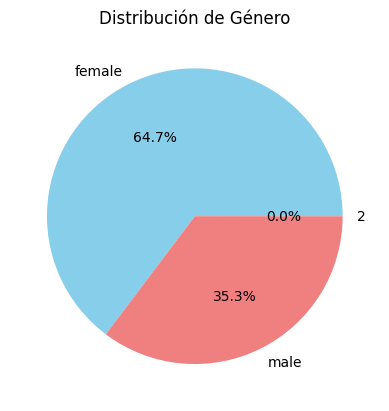

In [73]:

sample_train = train

# Convertir el DataFrame de Polars a Pandas
sample_train_pd = sample_train.to_pandas()

# Reemplazar 0 por 'male' y 1 por 'female' en la columna 'CODE_GENDER'
sample_train_pd["CODE_GENDER"] = sample_train_pd["CODE_GENDER"].replace({0: 'male', 1: 'female'})

# Contar el número de hombres y mujeres
gender_counts = sample_train_pd["CODE_GENDER"].value_counts()

# Crear gráfico de pastel
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Género')
plt.show()


Cual es la distribucion en la cantidad de niños que tienen los hombres y como es la de las mujeres que forman parte de la muestra.
Se evidencia que la distribucion en la cantidad de hijos es igual para hombres y para mujeres, en donde lo mas comun es que los que solicitan un credito tengan entre 0 y 1 hijo y es atipico quien tenga mas de 2 hijos.

El numero 2 que se encuentra en la pestaña de categoria es un pequeño numero de personas que no pusieron su genero.

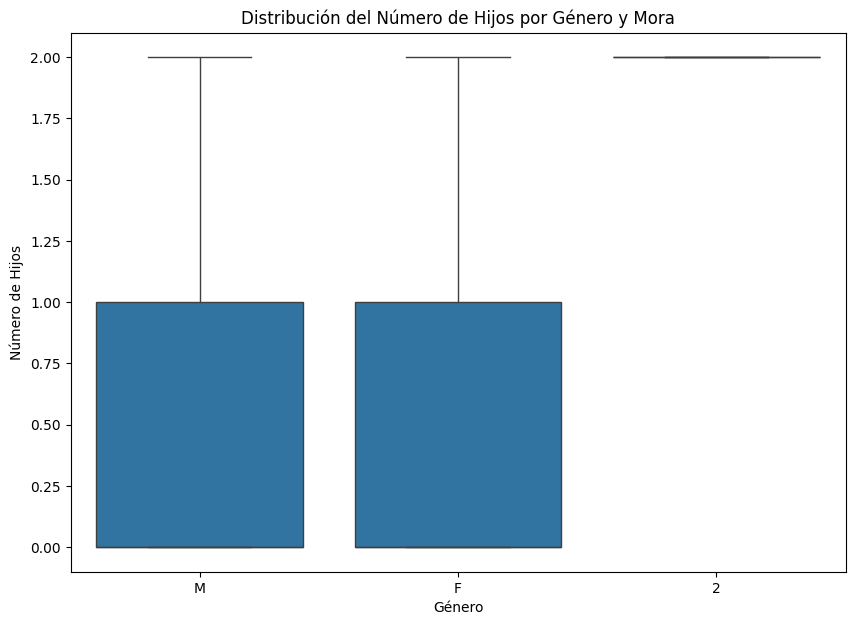

In [74]:
sample_train = train

# Convertir el DataFrame de Polars a Pandas
sample_train_pd = sample_train.to_pandas()

# Reemplazar los valores de 'CODE_GENDER' por 'M' para hombres y 'F' para mujeres
sample_train_pd["CODE_GENDER"] = sample_train_pd["CODE_GENDER"].replace({0: 'M', 1: 'F'})

# Crear el gráfico de caja con seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='CODE_GENDER', y='CNT_CHILDREN', data=sample_train_pd, ax=ax)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Hijos')
plt.title('Distribución del Número de Hijos por Género y Mora')
plt.show()


Ahora como influye el numero de hijos al pago del credito?
Increiblemente la gente con hijos tiende a pagar sus deudas de manera mas responsable que la gente sin hijos, esto puede deberse a que los padres tienen una mayor presion para no aumentar sus deudas debido a mora.


C:\Users\Admin\AppData\Local\Temp\ipykernel_1436\686534029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CNT_CHILDREN', data=mora_df, palette="hls", ax=ax)


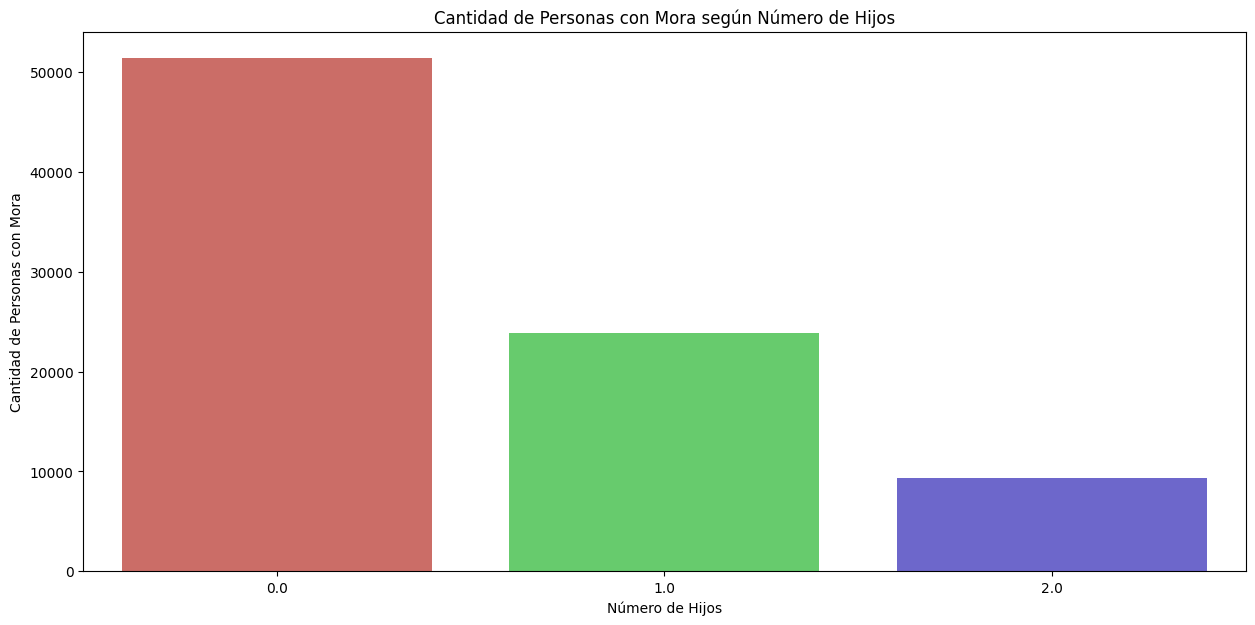

In [75]:
sample_train = train

# Convertir a pandas
sample_train_pd = sample_train.to_pandas()

# Filtrar solo donde TARGET == 1 (personas con mora)
mora_df = sample_train_pd[sample_train_pd["target"] == 1]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='CNT_CHILDREN', data=mora_df, palette="hls", ax=ax)

# Añadir etiquetas
plt.title("Cantidad de Personas con Mora según Número de Hijos")
plt.xlabel("Número de Hijos")
plt.ylabel("Cantidad de Personas con Mora")
plt.show()


Como esta distribuido el ingreso total para las personas que incurren en mora y como esta distribuido para quienes no.
Las personas que no incurren en mora tienen una distribucion mucho mas uniforme que quienes si incurren en mora, esto indica que las personas que no incurren en mora pueden tener cualquier tipo de salario pero hay algunos salarios especificos donde se acumulan las personas que incurren en mora, por ejemplo es muy notable que las personas que mas probabilidad tienen de incurrir en mora son las persiben un ingreso neto entre 11.5 y 12 puntos en la escala logaritmica.

Debemos recordar que despues del preprocesamiento de los datos las columnas de ingreso estan en escala logaritmica.

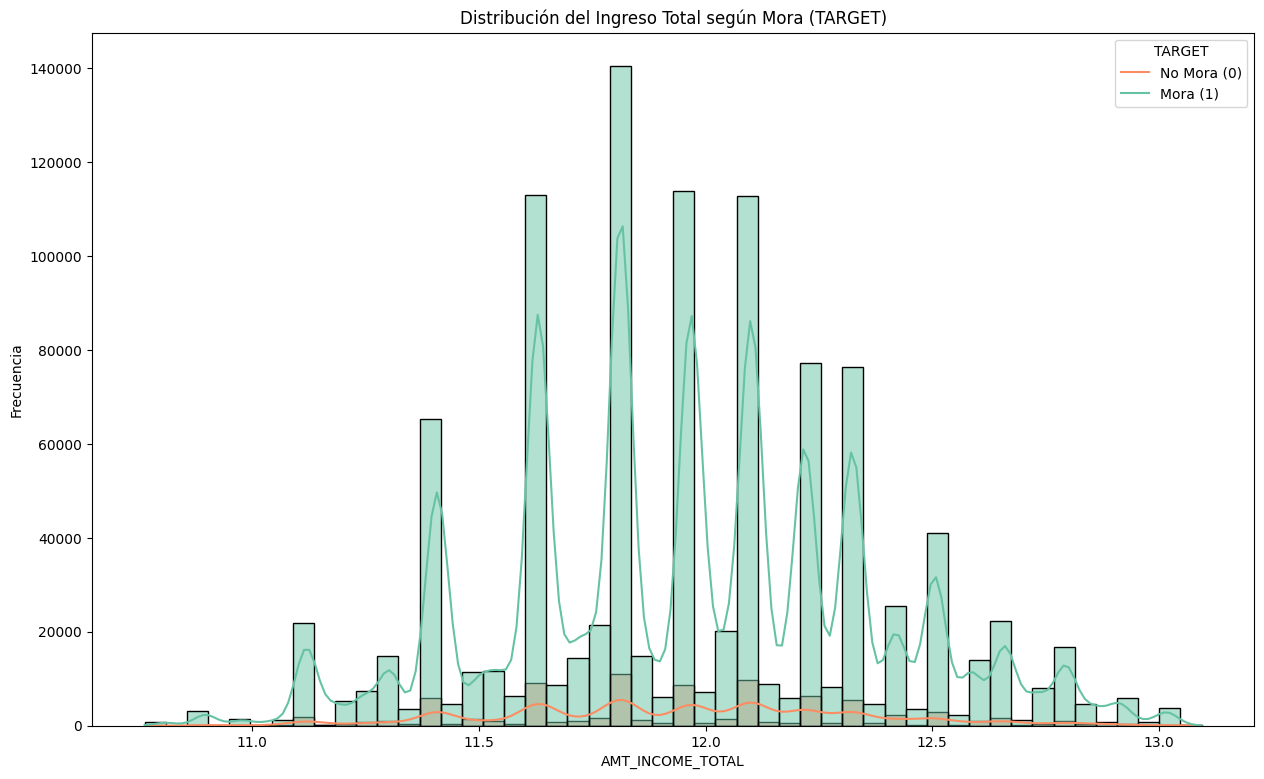

In [80]:

sample_train_pd = train

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(data=sample_train_pd, x='AMT_INCOME_TOTAL', hue='target', kde=True, bins=50, palette='Set2', ax=ax)

# Etiquetas y título
plt.title("Distribución del Ingreso Total según Mora (TARGET)")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Frecuencia")
plt.legend(title="TARGET", labels=["No Mora (0)", "Mora (1)"])
plt.show()
